## Final Project Submission

Please fill out:
* Student name: **Chelsea Power**
* Student pace: **part time**
* Scheduled project review date/time: **March 7, 2019 at 11 am ET**
* Instructor name: **Joe San Pietro**
* Blog post URL: **TBD**


## Phase 1: Understanding the Dataset

* Import the housing sale prices in King County, USA between the time period May 2014 - May 2015. 

In [1]:
#Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
plt.style.use('seaborn')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('kc_house_data.csv')

#Look at size of the dataset
df.shape

(21597, 21)

### Variable definitions

* id - Unique ID for each home sold 
* date - Date of the home sale 
* price - Price of each home sold 
* bedrooms - Number of bedrooms 
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower 
* sqft_living - Square footage of the apartments interior living space 
* sqft_lot - Square footage of the land space 
* floors - Number of floors 
* waterfront - For whether the apartment was overlooking the waterfront or not 1’s represent a waterfront property, 0’s represent a non-waterfront property 
* view - An index from 0 to 4 of how good the view of the property was, 0 - lowest, 4 - highest 
* condition - An index from 1 to 5 on the condition of the apartment, 1 - lowest, 4 - highest 
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of * construction and design, and 11-13 have a high quality level of construction and design. 
* sqft_above - The square footage of the interior housing space that is above ground level 
* sqft_basement - The square footage of the interior housing space that is below ground level 
* yr_built - The year the house was initially built 
* yr_renovated - The year of the house’s last renovation 
* zipcode - What zipcode area the house is in 
* lat - Lattitude 
* long - Longitude 
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors 
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Phase 2: Scrubbing (Data Preparation)

* Detecting and deal with missing values
* Data type conversions (e.g. numeric data mistakenly encoded as objects/strings)
* Checking for and removing multicollinearity (correlated predictors)

In [2]:
# Checking the column types and entries per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


* Replace null values for `waterfront`, `view` and `yr_renovated`

In [3]:
# Replace null values with 0 rather than removing 2376 rows
# Waterfront is a category variable where 0 = no view and 1 = view
df['waterfront'].fillna(0, inplace=True)
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [4]:
# Replace 63 null values with 0 to be equilivant to no view to onvert variable from a float to an int
# View is a categorical value
df['view'].fillna(0, inplace=True)
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
# Replace null values with 0 so I can convert yr_renovated from a float to an int
df['yr_renovated'].fillna(0, inplace=True)
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Change types of the variables 

* Change objects to appropiate formats
* Make categorical variables

In [6]:
# Convert from object to datetime
df['date'] = df['date'].astype('datetime64[ns]')

# Convert from object to int64
df['yr_renovated'] = df['yr_renovated'].astype('int64')

# Make categorical variables
df["waterfront"] = df["waterfront"].astype('category')
df["condition"] = df["condition"].astype('category')
df["view"] = df["view"].astype('category')
df["grade"] = df["grade"].astype('category')
df["yr_renovated"] = df["yr_renovated"].astype('category')

# Convert sqft_basement from object to float
df['sqft_basement'] = pd.to_numeric(df["sqft_basement"], errors = 'coerce').fillna(0, downcast='infer')

## Summary

* All columns have missing values removed and have been set to the correct type
* Will not be considering the means and std values for categorical (`waterfront`, `view`, `condition` and `grade`) and datetime (`date`) variables
* Will not be considering the means and std values for `id`, `zipcode`, `lat`, `long` columns
* Create heatmap to identify most important features and explore the intercorrelation between features

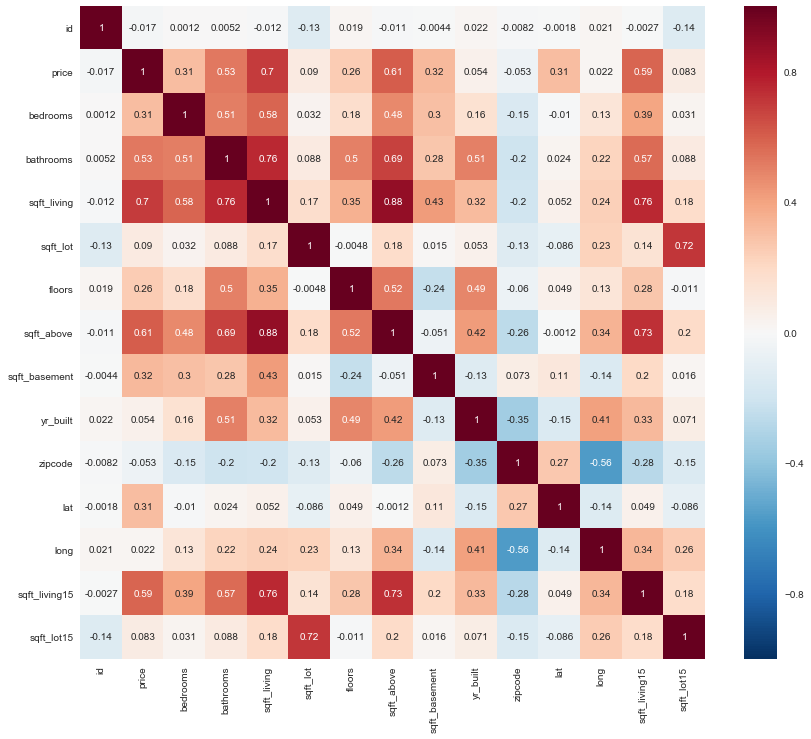

In [7]:
#Create coorelation heatmap
correlation = df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [8]:
# Remove ID
df_pred = df.drop(['id'], axis=1)

# Filter bedrooms 5 or less
df_pred.drop(df_pred[ df_pred['bedrooms'] > 5 ].index, inplace=True)

# Filter bathrooms 0 to 4
df_pred.drop(df_pred[ (df_pred['bathrooms'] <= 0) & (df_pred['bathrooms'] >= 4) ].index, inplace=True)

# Filter sqft_above size 4,000 or less
df_pred.drop(df_pred[ df_pred['sqft_above'] > 4000 ].index, inplace=True)

# Filter sqft_basement size l,000 or less
df_pred.drop(df_pred[ df_pred['sqft_basement'] > 1000 ].index, inplace=True)

# Filter sqft_living size 4,000 or less
df_pred.drop(df_pred[ df_pred['sqft_living'] > 4000 ].index, inplace=True)

# Filter sqft_living15 size 4,000 or less
df_pred.drop(df_pred[ df_pred['sqft_living15'] > 4000 ].index, inplace=True)

# Filter sqft_lot size 30,000 or less
df_pred.drop(df_pred[ df_pred['sqft_lot'] > 30000 ].index, inplace=True)

# Filter sqft_lot15 size 20,000 or less
df_pred.drop(df_pred[ df_pred['sqft_lot15'] > 20000 ].index, inplace=True)

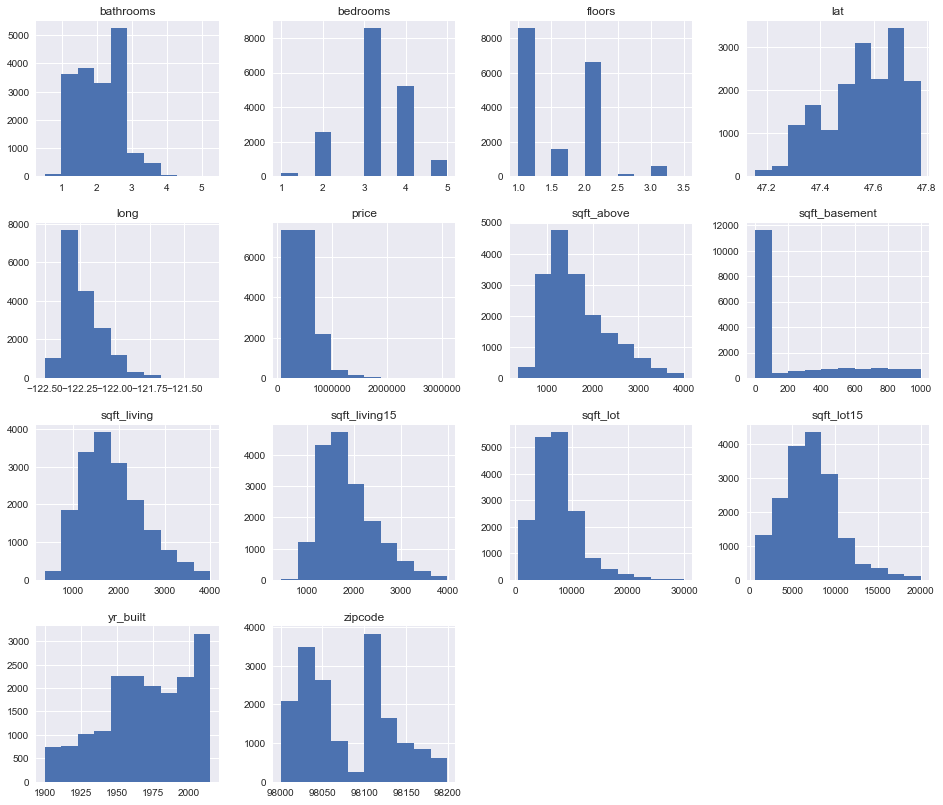

In [9]:
# Show histogram again with dropped outliners
df_pred.hist(figsize = [16, 14]);

## Phase 3: Exploring

* Log transform variables in new DataFrame `df_log`
* Cannot log transform `sqft_basement` since there are 303 rows of 0's in this column
* Cannot log transform `yr_renovated` since there are 70 rows of 0's in this column
* Both of these variables are candiadates to dropped and/or become category variables

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


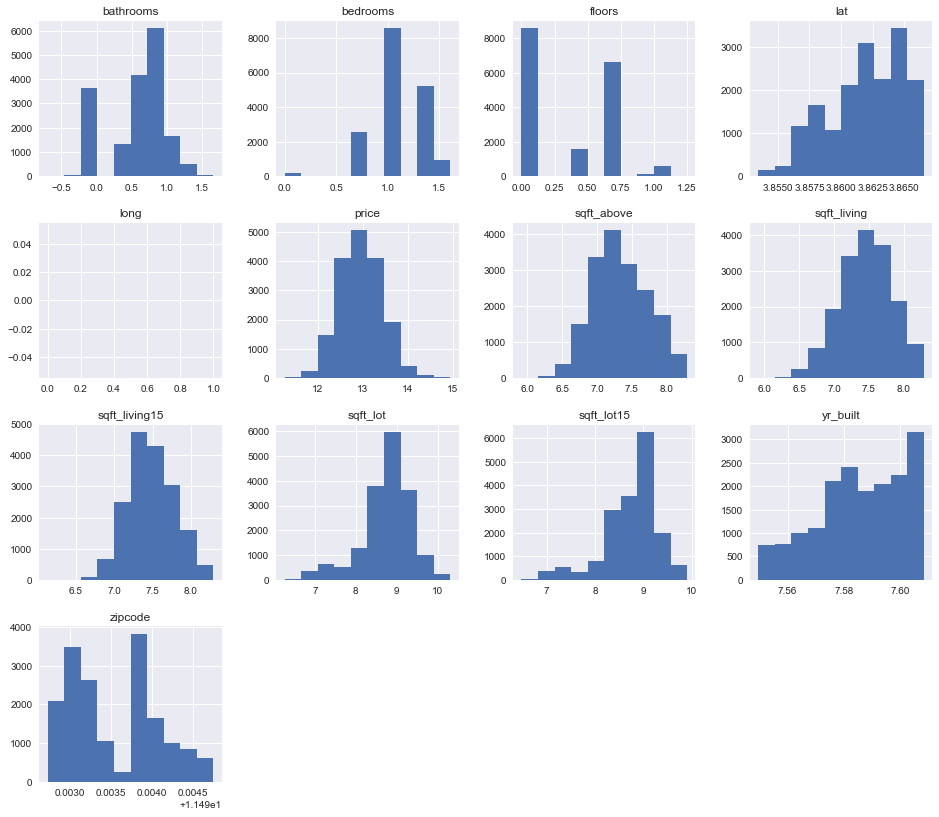

In [10]:
# Log transform variables

df_log = pd.DataFrame([])
df_log["bedrooms"] = np.log(df_pred["bedrooms"])
df_log["bathrooms"] = np.log(df_pred["bathrooms"])
df_log["floors"] = np.log(df_pred["floors"])
df_log["lat"] = np.log(df_pred["lat"])
df_log["long"] = np.log(df_pred["long"])
df_log["price"] = np.log(df_pred["price"])
df_log["sqft_above"] = np.log(df_pred["sqft_above"])
# sqft_basement variable is not log transformed because it has 0's in it
# consider making sqft_basement a category
df_log["sqft_living"] = np.log(df_pred["sqft_living"])
df_log["sqft_living15"] = np.log(df_pred["sqft_living15"])
df_log["sqft_lot"] = np.log(df_pred["sqft_lot"])
df_log["sqft_lot15"] = np.log(df_pred["sqft_lot15"])
df_log["yr_built"] = np.log(df_pred["yr_built"])
# yr_renovated variable is not log transformed because it has 0's in it
# consider making a new category with yr_renovated
df_log["zipcode"] = np.log(df_pred["zipcode"])
df_log.hist(figsize  = [16, 14]);

In [11]:
# Remove ID
df_log = df.drop(['long','id','date'], axis=1)
df_log.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0,98178,47.5112,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991,98125,47.7210,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0,98028,47.7379,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0,98136,47.5208,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0,98074,47.6168,1800,7503


## Phase 4: Modeling

* Create OLS Model get R-squared & P-values
* Compare continuous features to categorical
* Conduct recrussive feature elimination
* Train/Test Split
* 10-fold cross validation

In [15]:
df_pred.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
import matplotlib.pyplot as plt
#%matplotlib notebook
plt.style.available
plt.style.use('ggplot')

df_plot1 = df_pred.drop(['bathrooms','sqft_living','sqft_lot',
                            'waterfront','view','condition', 'sqft_above',
                           'sqft_basement','yr_built','yr_renovated','zipcode',
                           'lat','long','sqft_living15','sqft_lot15'], axis=1)

df_plot1.head()

,date,price,bedrooms,floors,grade
0,2014-10-13,221900.0,3,1.0,7
1,2014-12-09,538000.0,3,2.0,7
2,2015-02-25,180000.0,2,1.0,6
3,2014-12-09,604000.0,4,1.0,7
4,2015-02-18,510000.0,3,1.0,8


<IPython.core.display.Javascript object>


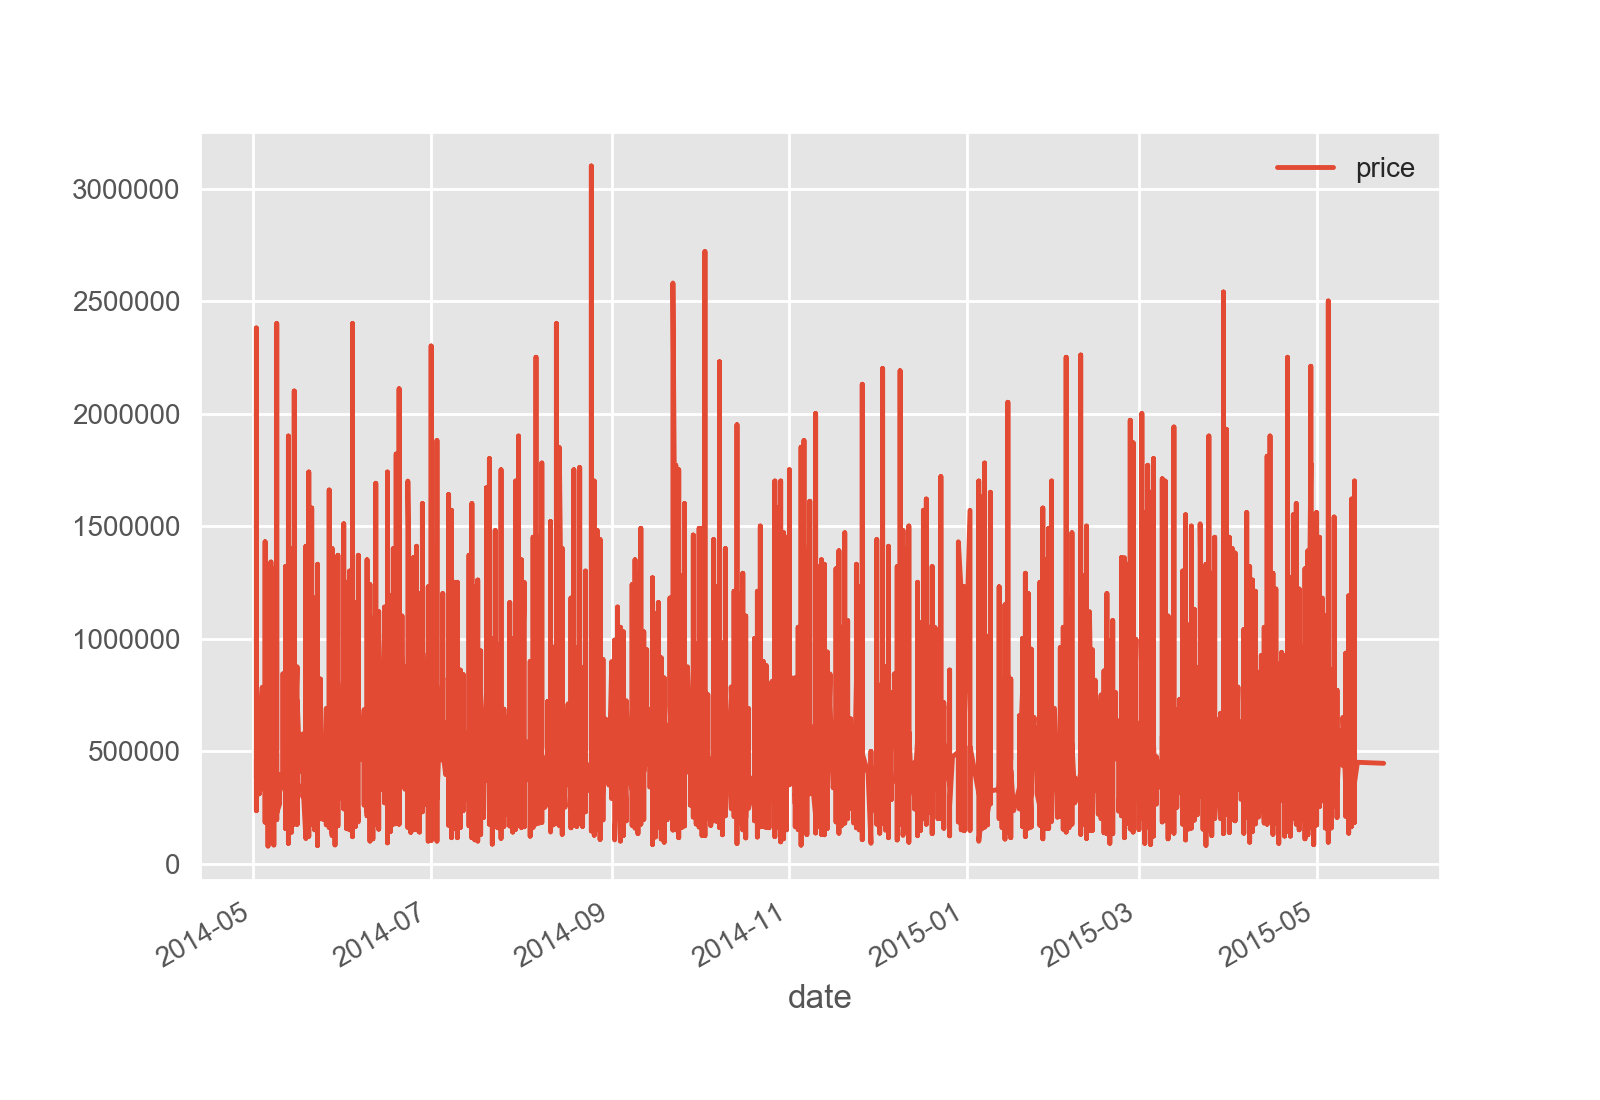

In [23]:
df_plot1.plot('date', 'price', kind='line');

<IPython.core.display.Javascript object>


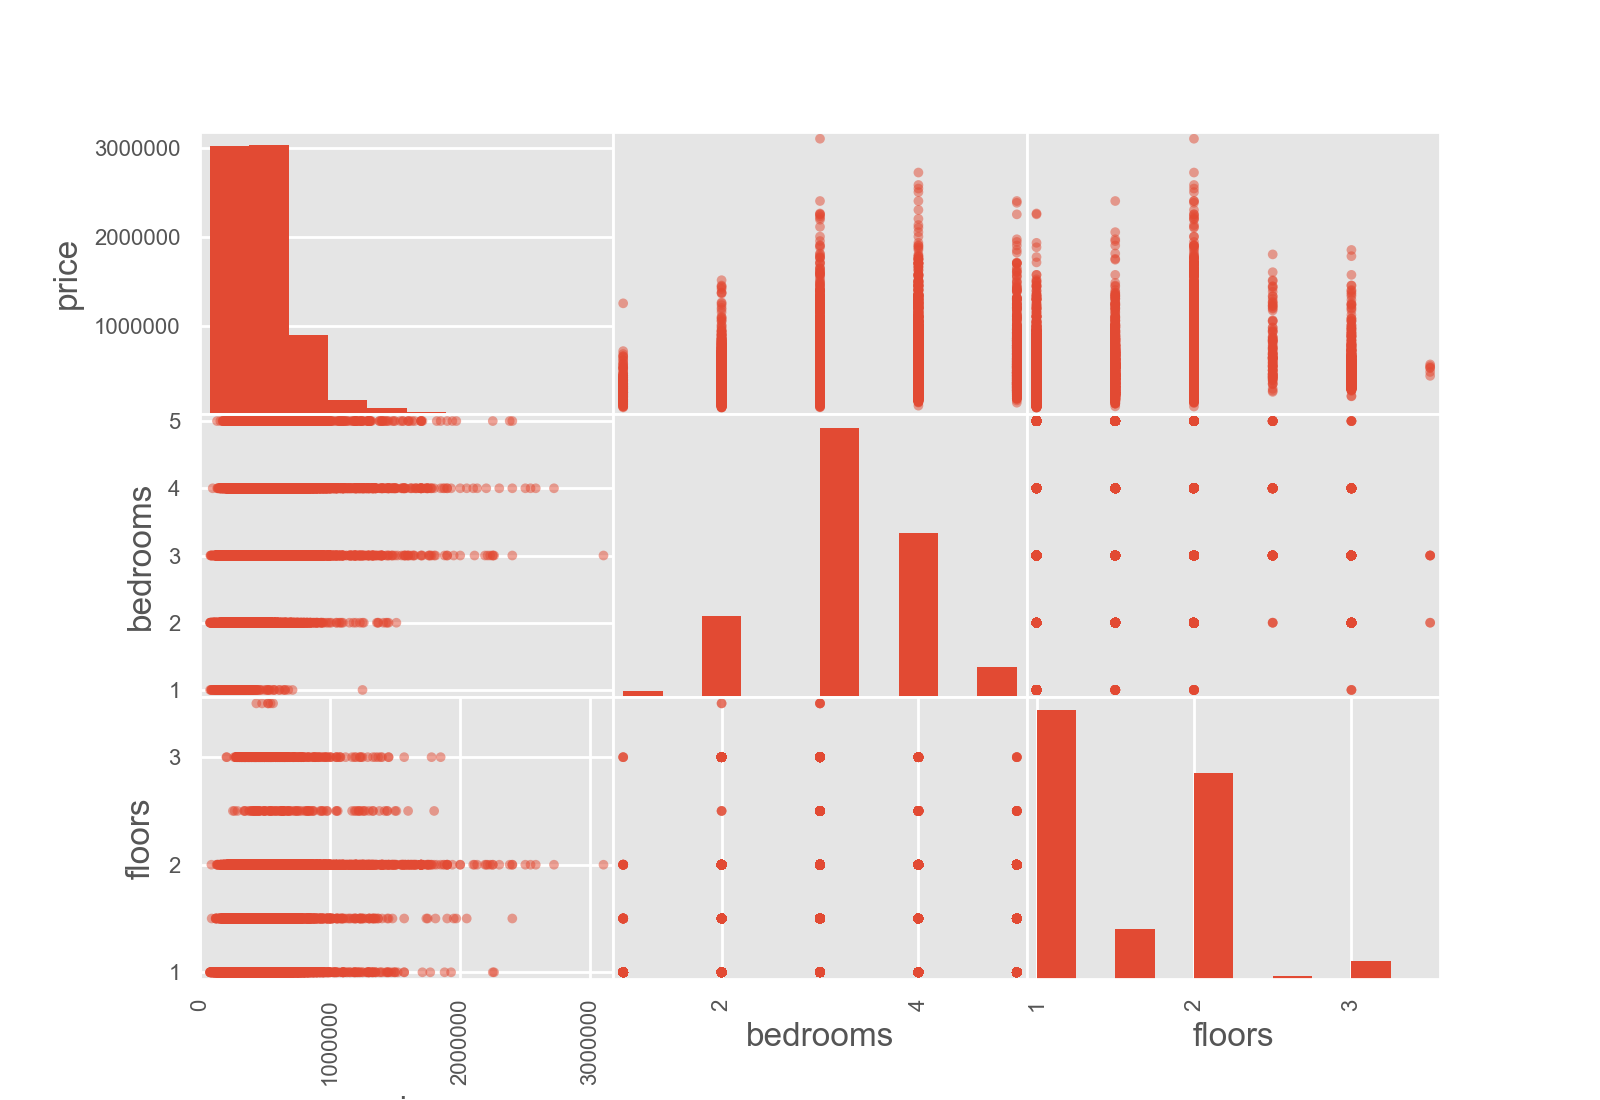

In [37]:
pd.plotting.scatter_matrix(df_plot1);

<IPython.core.display.Javascript object>


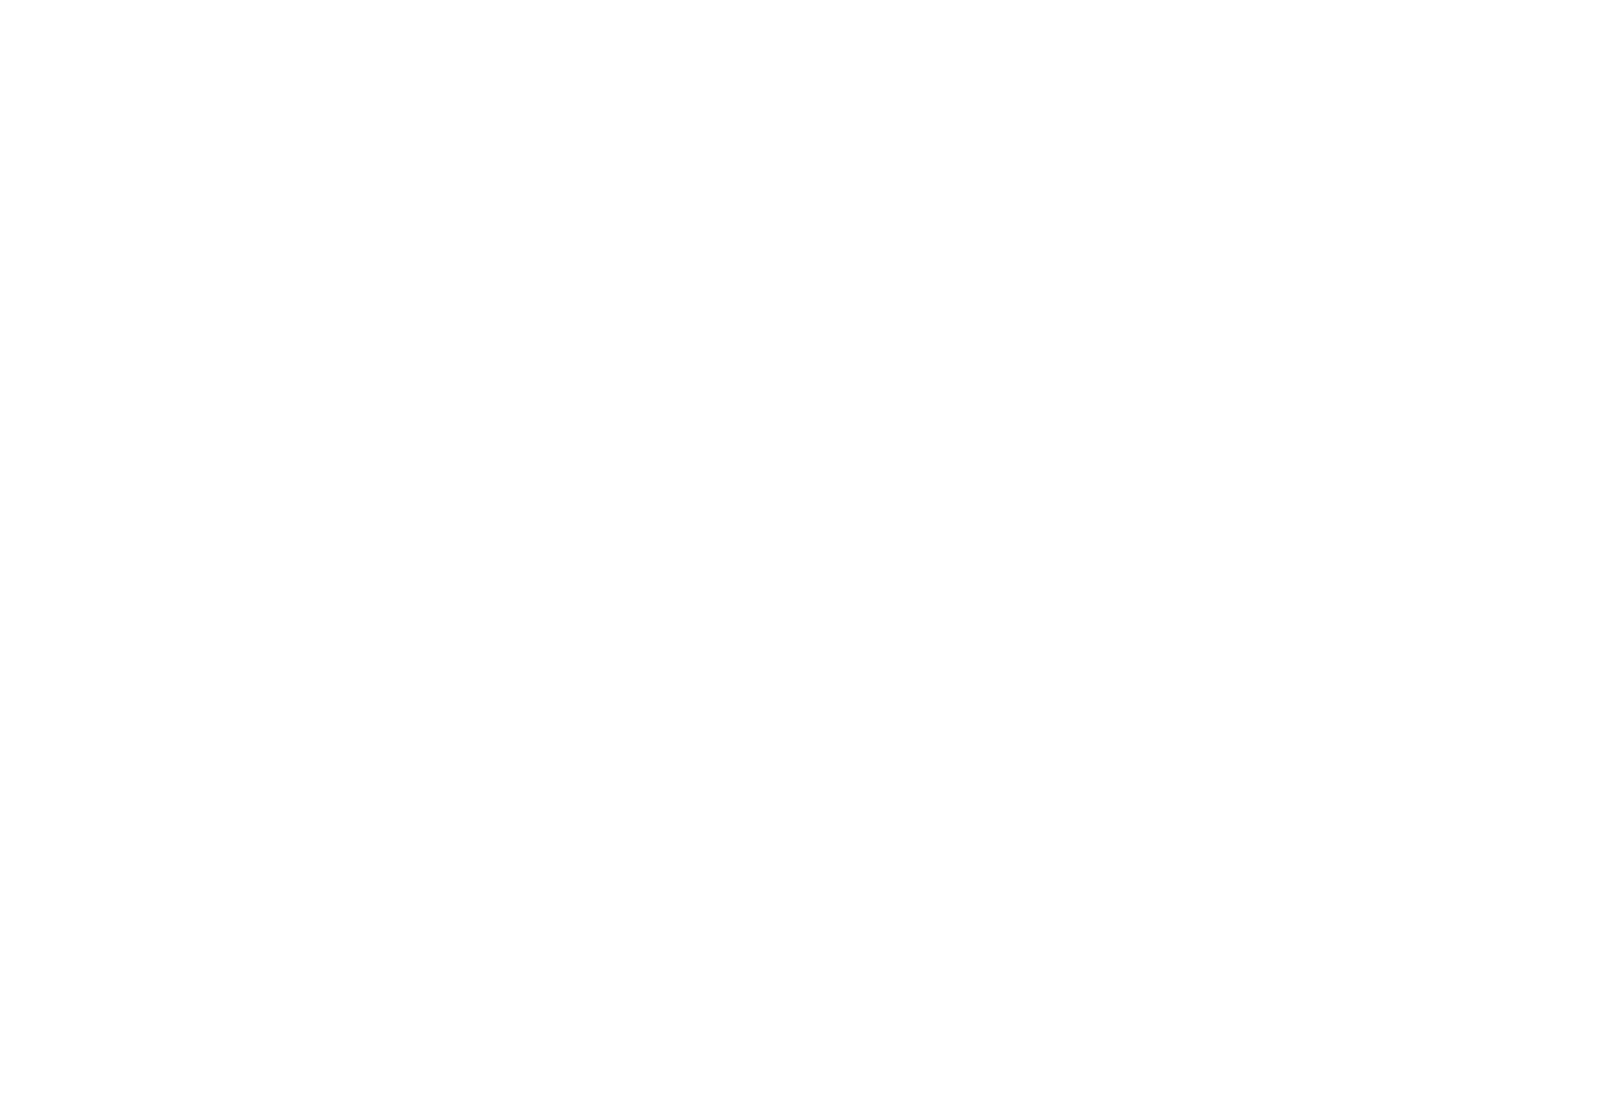

NameError: name 'iris' is not defined

In [38]:
colormap = ('skyblue', 'salmon', 'lightgreen')
plt.figure()
pd.plotting.parallel_coordinates(iris, 'species', color=colormap);

### Build a model with each categorical variable as a predictor

* Create a new dataset with "One Hot Encoded" categories
* Run against log transformed and regular `price`
* Use the 4 categorical variables: `waterfront`, `view`, `condition`, and `grade`

In [12]:
# Create new data set with only price and the category variables
df_categories = df_pred.drop(['date','bedrooms','bathrooms','sqft_living',
                                 'sqft_lot','floors','sqft_above','sqft_basement',
                                 'yr_built', 'yr_renovated','zipcode','lat', 'long',
                             'sqft_living15', 'sqft_lot15'], axis=1)

In [13]:
# One Hot Encode the category data set
one_hot_df = pd.get_dummies(df_categories)
one_hot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17459 entries, 0 to 21596
Data columns (total 24 columns):
price             17459 non-null float64
waterfront_0.0    17459 non-null uint8
waterfront_1.0    17459 non-null uint8
view_0.0          17459 non-null uint8
view_1.0          17459 non-null uint8
view_2.0          17459 non-null uint8
view_3.0          17459 non-null uint8
view_4.0          17459 non-null uint8
condition_1       17459 non-null uint8
condition_2       17459 non-null uint8
condition_3       17459 non-null uint8
condition_4       17459 non-null uint8
condition_5       17459 non-null uint8
grade_3           17459 non-null uint8
grade_4           17459 non-null uint8
grade_5           17459 non-null uint8
grade_6           17459 non-null uint8
grade_7           17459 non-null uint8
grade_8           17459 non-null uint8
grade_9           17459 non-null uint8
grade_10          17459 non-null uint8
grade_11          17459 non-null uint8
grade_12          17459 non-nul

In [14]:
# Rename the columns / remove the ".0"
one_hot_df.columns = ['price','waterfront0','waterfront1','view0',
                     'view1','view2','view3','view4','condition1',
                     'condition2','condition3','condition4','condition5',
                     'grade3','grade4','grade5','grade6','grade7','grade8',
                     'grade9','grade10','grade11','grade12','grade13',]
one_hot_df.head()

,price,waterfront0,waterfront1,view0,view1,view2,view3,view4,condition1,condition2,...,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,grade13
0,221900.0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,538000.0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,180000.0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Recrussive feature elimination (RFE)

* Look at all log transformed features
* Create a for loop using RFE where we look at the best features to be selected according to the feature ranking algorithm. 

In [54]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

#Look at the one best feature against the full log transformed dataset
selector = RFE(linreg, n_features_to_select=1)
Y = df_log['price']
X = df_log.drop(['price', 'waterfront','view','condition','grade'], axis=1)
selector = selector.fit(X, Y)

In [55]:
selector.ranking_

array([ 3,  2,  7, 13,  4,  9, 10,  5, 11,  6,  1,  8, 12])

In [56]:
#Best feature from the full set of log transformed variables is lat
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [57]:
ranking = selector.ranking_

In [58]:
features = pd.DataFrame({'Columns': X.columns,
                        'Ranking': ranking})
features

,Columns,Ranking
0,bedrooms,3
1,bathrooms,2
2,sqft_living,7
3,sqft_lot,13
4,floors,4
5,sqft_above,9
6,sqft_basement,10
7,yr_built,5
8,yr_renovated,11
9,zipcode,6


array([3, 2, 1, 4])